<a href="https://colab.research.google.com/github/Sasaki0Kojiro/hello-world/blob/main/pytorch1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
%matplotlib  inline

In [30]:
import torch 
import torchvision
import torchvision.transforms as transforms

In [31]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [32]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [33]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [34]:
for epoch in range(2):
  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    inputs,label = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs,label)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i %2000 == 1999:
      print('[%d,%5d] loss:%.3f'%
            (epoch +1,i+1,running_loss/2000))
      running_loss = 0.0
print('Finished Training')

[1, 2000] loss:2.210
[1, 4000] loss:1.823
[1, 6000] loss:1.658
[1, 8000] loss:1.574
[1,10000] loss:1.505
[1,12000] loss:1.441
[2, 2000] loss:1.393
[2, 4000] loss:1.364
[2, 6000] loss:1.324
[2, 8000] loss:1.317
[2,10000] loss:1.302
[2,12000] loss:1.281
Finished Training


In [35]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

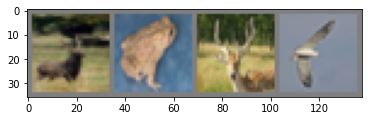

 deer  frog  deer  bird


In [36]:
import matplotlib.pyplot as plt
import numpy as np

# 画像の表示関数


def imshow(img):
    img = img / 2 + 0.5     # 正規化を戻す
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 適当な訓練セットの画像を取得
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 画像の表示
imshow(torchvision.utils.make_grid(images))
# ラベルの表示
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

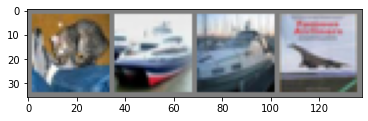

GroundTorch:   cat  ship  ship plane


In [37]:
dataiter = iter(testloader)
images,labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTorch:',' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [38]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [39]:
putputs = net(images)

In [40]:
_,predicted = torch.max(outputs,1)
print(' '.join('%5s' % classes[predicted[j]]
               for j in range(4)))

 ship   dog horse truck


In [41]:
correct = 0
total = 0 
with torch.no_grad():
  for data in testloader:
    images,labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' %(
    100 * correct / total))

class_correct = list(0. for i in range(10))
class_total = list(0.for i in range(10))
with torch.no_grad():
  for data in testloader:
    images,labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs,1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % (
      classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of the network on the 10000 test images: 54 %
Accuracy of plane : 65 %
Accuracy of   car : 69 %
Accuracy of  bird : 44 %
Accuracy of   cat : 47 %
Accuracy of  deer : 38 %
Accuracy of   dog : 36 %
Accuracy of  frog : 66 %
Accuracy of horse : 59 %
Accuracy of  ship : 58 %
Accuracy of truck : 63 %


In [42]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [43]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [44]:
inputs, labels = data[0].to(device), data[1].to(device)

In [45]:
optimizer = optim.SGD(net.parameters(), lr =0.001,momentum = 0.9)

for epoch in range(2):
  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    inputs,labels=data[0].to(device),data[1].to(device)

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if i % 2000 == 1999:
      print('[%d,%5d]loss:%.3f'%
            (epoch + 1, i+1,running_loss/2000))
      running_loss = 0.0

print('Finish')

[1, 2000]loss:1.218
[1, 4000]loss:1.206
[1, 6000]loss:1.205
[1, 8000]loss:1.188
[1,10000]loss:1.202
[1,12000]loss:1.173
[2, 2000]loss:1.114
[2, 4000]loss:1.109
[2, 6000]loss:1.112
[2, 8000]loss:1.108
[2,10000]loss:1.103
[2,12000]loss:1.117
Finish
